### selenium Chrome 접속  test

In [14]:
#!brew install --cask chromedriver
#!pip3 install webdriver_manager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

driver = webdriver.Chrome(service= Service(ChromeDriverManager().install()))

url = "https://www.naver.com/"
driver.get(url)
time.sleep(5)

# Blind 데이터 크롤링

In [91]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

#https://www.teamblind.com/kr/ 에 접속 하여 기업리뷰 클릭 > 회사명 검색 회사명 클릭 후 리뷰의 상단 URL
URL = "https://www.teamblind.com/kr/company/%ED%98%84%EB%8C%80%EC%9E%90%EB%8F%99%EC%B0%A8/reviews"
lastPage =250 #위의 URL의 페이지의 > 버튼 클릭 후 마지막 페이지 번호 입력
#이후 파일 실행 시 크롬브라우저가 자동 실행되고, 웹로그인 번호 입력이 나오면, 블라인드 앱 로그인 후 더보기 버튼 클릭 > 블라인드 웹 로그인 인증번호 입력
driver = webdriver.Chrome(service= Service(ChromeDriverManager().install()))#크롬드라이버 파일 위치로 blindCompany.py와 같은 위치에 있어야 함
driver.get(URL)
driver.find_element(By.CLASS_NAME,"btn_signin").click()
time.sleep(30)

#컨텐츠 부분 특수문제 제거 로직
def clean_str(text):
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    text = text.replace('\r','. ')
    return text

result = []

#저장 시 헤더 값
colname = ["총점","커리어 향상","업무와 삶의 균형","급여 및 복지","사내 문화", "경영진", "제목","직원유형","장점","단점"]

for p in range(1,lastPage+1):
    targetURL = URL +"?page="+ str(p)
    driver.get(targetURL)
    elements = driver.find_elements(By.CLASS_NAME,"review_item")
    time.sleep(5)
    for e in elements:
        rate = e.find_element(By.CLASS_NAME,"rating")
        #rate.find_element_by_id("button2").click()
        rate.find_element(By.CLASS_NAME,"more_rating").click()
        score = rate.find_element(By.CLASS_NAME,"num").text
        score = float(score.split("\n")[1])
        detailScores = e.find_elements(By.CSS_SELECTOR,"div.review_item_inr > div.rating > div.more_rating > span > span > span > div.ly_rating > div.rating_wp> span.desc > i.blind")
        title = e.find_element(By.CSS_SELECTOR,"div.review_item_inr > h3.rvtit > a").text
        status = e.find_element(By.CSS_SELECTOR,"div.review_item_inr > div.auth").text
        status = status.split("\n")[1]
        prosCons = e.find_elements(By.CSS_SELECTOR,"div.review_item_inr > div > div.parag > p > span")
        value = [score, detailScores[0].text, detailScores[1].text, detailScores[2].text, detailScores[3].text,
                 detailScores[4].text, title, status, clean_str(prosCons[0].text), clean_str(prosCons[1].text)]
        result.append(value)
        print(value)

df = pd.DataFrame(result,columns=colname)
df.head()

<>:53: SyntaxWarning: invalid escape sequence '\w'
<>:53: SyntaxWarning: invalid escape sequence '\w'
/var/folders/gv/h6tkbjcs4j325ypvzj8m08qc0000gn/T/ipykernel_2340/1996662391.py:53: SyntaxWarning: invalid escape sequence '\w'
  pattern = '[^\w\s]'         # 특수기호제거


[1.0, '1', '1', '1', '1', '1', '“연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”', '현직원 · 현********* · 구매·물류·SCM 전문가 - 2020.09.18', '연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임', '회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴']
[1.0, '1', '1', '1', '1', '1', '“인재 멸시의 현대자동차”', '현직원 · I********* · 연구개발(R&D) - 2020.09.22', '일 안해도 월급 똑같이 줍니다\n열심히 해도 고과는 어차피 인맥이랑 짬순이라\n놀고 먹어도 전혀 고과에 영향 없습니다\n매일 두시간 커피타임 보장이구요\n화장실에 한시간 쳐박혀 있어도 됩니다', '일 하면 돈은 안주고 일을 더 줍니다\n능력있는 사람들은 뼛가루까지 갈아먹고\n고과는 윗분들한테 아부하고 광파는 분이 다 먹습니다\n\n그냥 놀면서 다니세요']
[1.0, '1', '1', '1', '1', '1', "“진실된 리뷰는 '추천수'로 확인하세요”", '현직원 · 이******** · 연구개발(R&D) - 2023.08.11', '잘못된 리뷰가 많아 진실된 정보만 적습니다\n\n1 차 할인\n2 팀 분위기에 따라 다르지만 재택근무 가능\n3 여름에 아이스크림을 준다', '1 책임 진급 전까지 낮은 사원 기본급4000후반5000초반 타 대기업 대비 처참한 수준 참고로 호봉제라 상승률도 극악 그나마 책임 진급해도 가두리 연봉 진행\n2 그렇다고 성과금이 잘나오냐 그것도 아님 회사가 잘나가도 구리고 안나가면 기본급마저 동결\n3 남양연구소 기준 출퇴근이 지옥 최소 3시간은 쓴다고 보면 됨 날씨가 안좋은 경우는 기대이상\n4 커리어 개발은 없음 남아있는 시간이 길어질수록 그렇게 동료가 된다 탈출은 능력순\n5 최근 나오는 차량들 상태보면 알거임 에이스 대거 탈출로 인한 차량 상태 수준 그냥 가라앉을 일만 남

총점 커리어 향상 업무와 삶의 균형 급여 및 복지 사내 문화 경영진  \
0  1.0      1         1       1     1   1   
1  1.0      1         1       1     1   1   
2  1.0      1         1       1     1   1   
3  2.0      1         5       4     3   1   
4  1.0      1         4       1     1   1   

                                         제목  \
0  “연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”   
1                            “인재 멸시의 현대자동차”   
2                    “진실된 리뷰는 '추천수'로 확인하세요”   
3            “미래가없는 회사, 꿀빠는게 답이다라고 강요하는 회사”   
4                “회사가 잘나가도 입사후부터 연봉이 수직하강함”   

                                            직원유형  \
0  현직원 · 현********* · 구매·물류·SCM 전문가 - 2020.09.18   
1      현직원 · I********* · 연구개발(R&D) - 2020.09.22   
2       현직원 · 이******** · 연구개발(R&D) - 2023.08.11   
3      현직원 · l********* · 연구개발(R&D) - 2020.09.25   
4       현직원 · l******** · 연구개발(R&D) - 2020.10.05   

                                                  장점  \
0    연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임   
1  일 안해도 월급 똑같이 줍니다\n열심히 해도 고과는 어차피 인맥이랑 짬순이라\n놀고...   
2  잘못된 리뷰가 많아 진실된 정보만 적습니다\n\n1 차 할인\n2 팀 분위기에 따라...   
3  워라밸은 최고라해도 손색없음\n회사시스템자체가 꿀빠는게 이익이라 말하는듯한 구조\n...   
4     팀만 잘 고르면 워라밸 보장\n극단적으로 하루에 한시간정도만 일해도 되는 팀도 있음   

                                                  단점  
0        회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴  
1  일 하면 돈은 안주고 일을 더 줍니다\n능력있는 사람들은 뼛가루까지 갈아먹고\n고과...  
2  1 책임 진급 전까지 낮은 사원 기본급4000후반5000초반 타 대기업 대비 처참한...  
3  의사결정 주체가 없는 덩치큰 바보회사\n서로 결정을 미루다 문제 커지면 급한사람이 ...  
4  첨에 팀을 잘못골라서 밥도 못먹고 일하고 노가다 뛰기 일수였음 그런팀은 일한다고 위...

In [96]:
#df.to_csv('blind2.csv')
#df=pd.read_csv('blind2.csv')
#df

## df 전처리 

In [133]:

df['직무'] = df['직원유형'].str.split('·').str[2].str.split('-').str[0].str.strip()
# '직원유형' 컬럼 삭제
df = df.drop(columns=['직원유형'])
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

총점  커리어 향상  업무와 삶의 균형  급여 및 복지  사내 문화  경영진  \
0  1.0       1          1        1      1    1   
1  1.0       1          1        1      1    1   
2  1.0       1          1        1      1    1   
3  2.0       1          5        4      3    1   
4  1.0       1          4        1      1    1   

                                         제목  \
0  “연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”   
1                            “인재 멸시의 현대자동차”   
2                    “진실된 리뷰는 '추천수'로 확인하세요”   
3            “미래가없는 회사, 꿀빠는게 답이다라고 강요하는 회사”   
4                “회사가 잘나가도 입사후부터 연봉이 수직하강함”   

                                                  장점  \
0    연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임   
1  일 안해도 월급 똑같이 줍니다\n열심히 해도 고과는 어차피 인맥이랑 짬순이라\n놀고...   
2  잘못된 리뷰가 많아 진실된 정보만 적습니다\n\n1 차 할인\n2 팀 분위기에 따라...   
3  워라밸은 최고라해도 손색없음\n회사시스템자체가 꿀빠는게 이익이라 말하는듯한 구조\n...   
4     팀만 잘 고르면 워라밸 보장\n극단적으로 하루에 한시간정도만 일해도 되는 팀도 있음   

                                                  단점         직무  
0        회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴         구매  
1  일 하면 돈은 안주고 일을 더 줍니다\n능력있는 사람들은 뼛가루까지 갈아먹고\n고과...  연구개발(R&D)  
2  1 책임 진급 전까지 낮은 사원 기본급4000후반5000초반 타 대기업 대비 처참한...  연구개발(R&D)  
3  의사결정 주체가 없는 덩치큰 바보회사\n서로 결정을 미루다 문제 커지면 급한사람이 ...  연구개발(R&D)  
4  첨에 팀을 잘못골라서 밥도 못먹고 일하고 노가다 뛰기 일수였음 그런팀은 일한다고 위...  연구개발(R&D)

## KONLP 형태소분석

In [134]:
#%%bash
#apt-get update
#apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1
!pip3 install konlpy
!apt-get update -qq
!apt-get install fonts-nanum*-qq
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"  
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*-qq
env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [157]:
df.head(5)

총점  커리어 향상  업무와 삶의 균형  급여 및 복지  사내 문화  경영진  \
0  1.0       1          1        1      1    1   
1  1.0       1          1        1      1    1   
2  1.0       1          1        1      1    1   
3  2.0       1          5        4      3    1   
4  1.0       1          4        1      1    1   

                                         제목  \
0  “연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”   
1                            “인재 멸시의 현대자동차”   
2                    “진실된 리뷰는 '추천수'로 확인하세요”   
3            “미래가없는 회사, 꿀빠는게 답이다라고 강요하는 회사”   
4                “회사가 잘나가도 입사후부터 연봉이 수직하강함”   

                                                  장점  \
0    연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임   
1  일 안해도 월급 똑같이 줍니다\n열심히 해도 고과는 어차피 인맥이랑 짬순이라\n놀고...   
2  잘못된 리뷰가 많아 진실된 정보만 적습니다\n\n1 차 할인\n2 팀 분위기에 따라...   
3  워라밸은 최고라해도 손색없음\n회사시스템자체가 꿀빠는게 이익이라 말하는듯한 구조\n...   
4     팀만 잘 고르면 워라밸 보장\n극단적으로 하루에 한시간정도만 일해도 되는 팀도 있음   

                                                  단점         직무  
0        회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴         구매  
1  일 하면 돈은 안주고 일을 더 줍니다\n능력있는 사람들은 뼛가루까지 갈아먹고\n고과...  연구개발(R&D)  
2  1 책임 진급 전까지 낮은 사원 기본급4000후반5000초반 타 대기업 대비 처참한...  연구개발(R&D)  
3  의사결정 주체가 없는 덩치큰 바보회사\n서로 결정을 미루다 문제 커지면 급한사람이 ...  연구개발(R&D)  
4  첨에 팀을 잘못골라서 밥도 못먹고 일하고 노가다 뛰기 일수였음 그런팀은 일한다고 위...  연구개발(R&D)

In [158]:
title

Counter({'회사': 3487,
         '라벨': 977,
         '보장': 778,
         '직원': 275,
         '대기업': 266,
         '연봉': 207,
         '급여': 202,
         '문화': 180,
         '최고': 170,
         '미래': 148,
         '생각': 144,
         '기업': 133,
         '부바': 133,
         '자동차': 131,
         '커리어': 125,
         '사람': 104,
         '복지': 100,
         '노조': 90,
         '보상': 89,
         '그냥': 84,
         '최악': 77,
         '성과': 76,
         '업무': 70,
         '영진': 67,
         '성장': 65,
         '하나': 63,
         '발전': 62,
         '중소기업': 59,
         '근무': 59,
         '부서': 56,
         '점점': 56,
         '무난': 55,
         '현대': 53,
         '생산': 53,
         '장점': 51,
         '안정': 50,
         '팀바팀': 47,
         '나름': 46,
         '국내': 44,
         '직장': 43,
         '분위기': 42,
         '과거': 42,
         '조직': 42,
         '별로': 42,
         '군대': 41,
         '공무원': 40,
         '연구소': 39,
         '기대': 38,
         '대비': 37,
         '성과급': 35,
         '대한': 35,
   

# Main

In [184]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt

def make_word_cloud(arg, description):
    okt = Okt()
    nouns = okt.nouns(arg)  # 명사만 추출
    words = [n for n in nouns if len(n) > 1]  # 단어의 길이가 1개인 것은 제외
    cons = Counter(words)  # 단어별 빈도수 딕셔너리 데이터 생성
    # 특정 단어와 그 횟수 제거하기
    words_to_remove = ["회사",'직원','자동차','장점','사람','가능']
    for remove_word in words_to_remove:
        if remove_word in cons:
            del cons[remove_word]
    # 특정 단어 교체하기
    if "라벨" in cons:
        cons["워라벨"] = cons.pop("라벨")
    wc = WordCloud(
        font_path="AppleGothic",
        width=400,
        height=400,
        scale=2.0,
        max_font_size=250,
        background_color="white",
    )
    result = wc.generate_from_frequencies(cons)
    plt.figure()
    plt.title(description)  # 제목 추가
    plt.imshow(result, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return result

### 총점이 낮은 컬럼들의 단점 

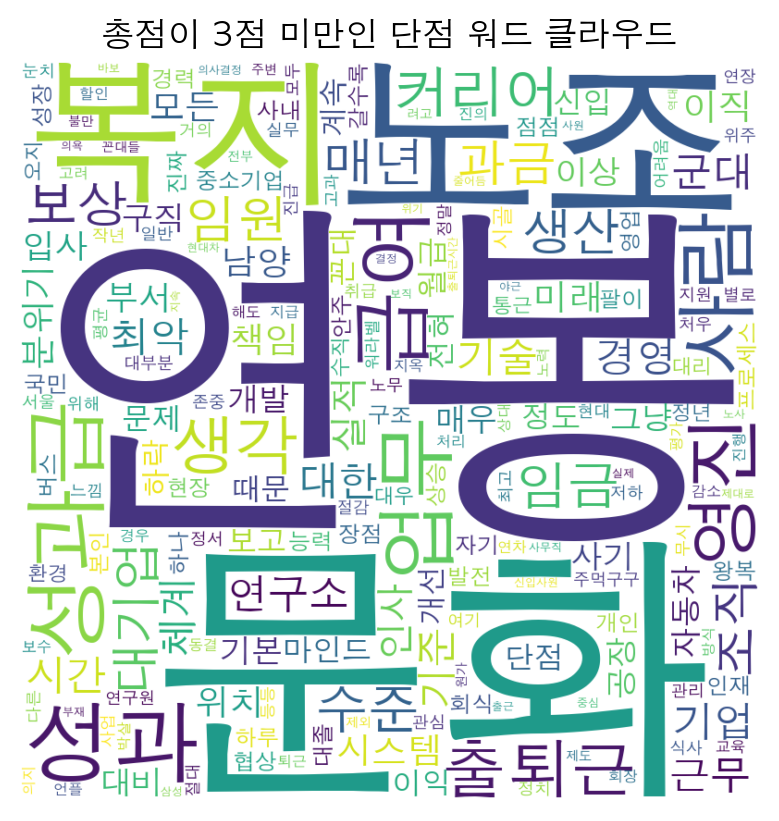

In [175]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[df["총점"] < 3]["단점"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "총점이 3점 미만인 단점 워드 클라우드")


### 총점이 낮은 컬럼들의 장점

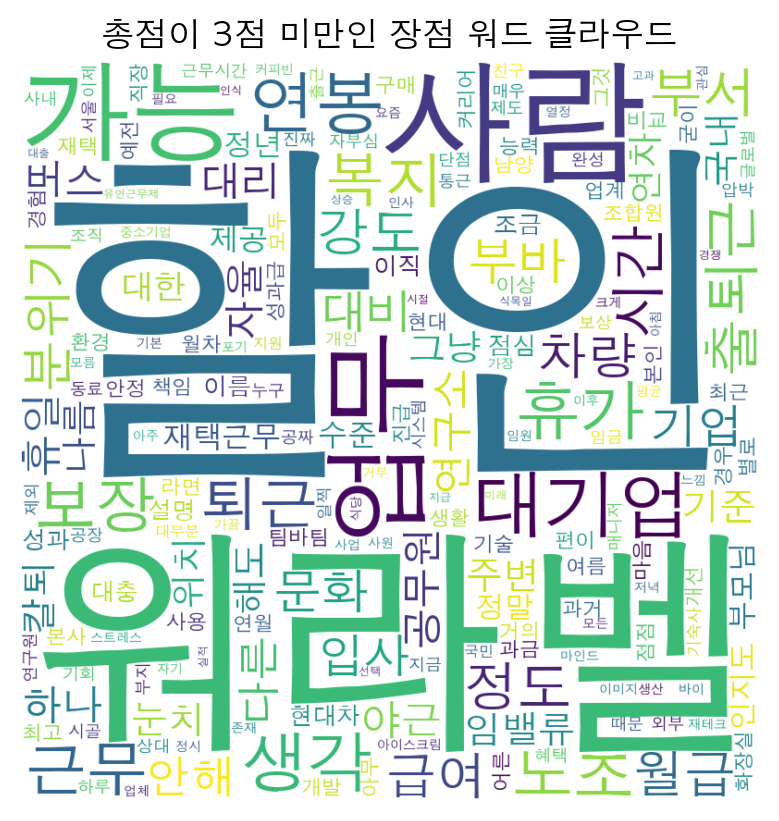

In [179]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[df["총점"] < 3]["장점"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "총점이 3점 미만인 장점 워드 클라우드")


### 총점이 높은 컬럼들의 단점 

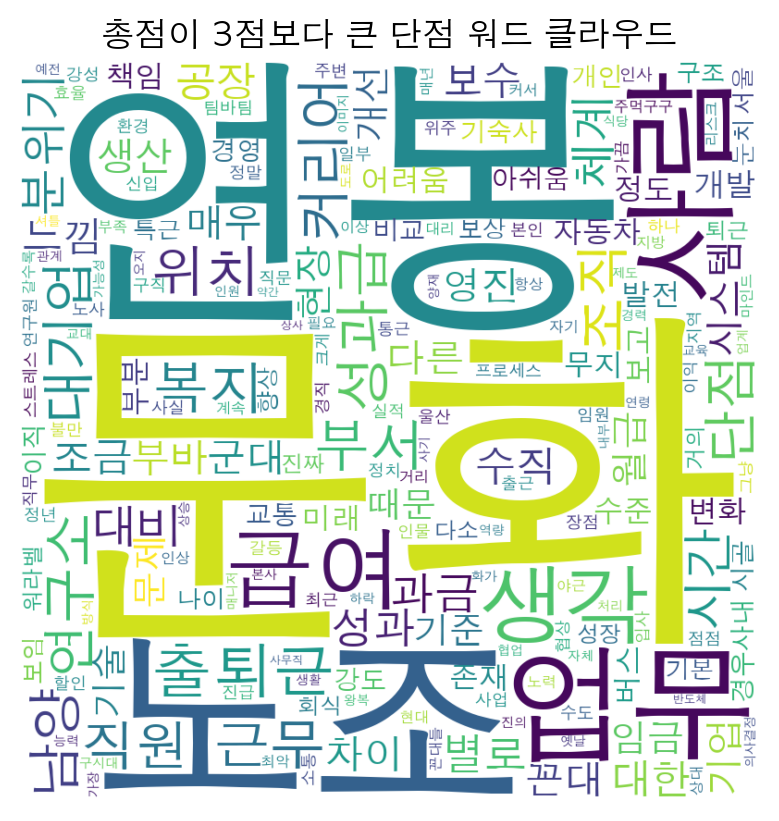

In [166]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[df["총점"] > 3]["단점"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "총점이 3점보다 큰 단점 워드 클라우드")


### 총점이 높은 컬럼들의 장점 

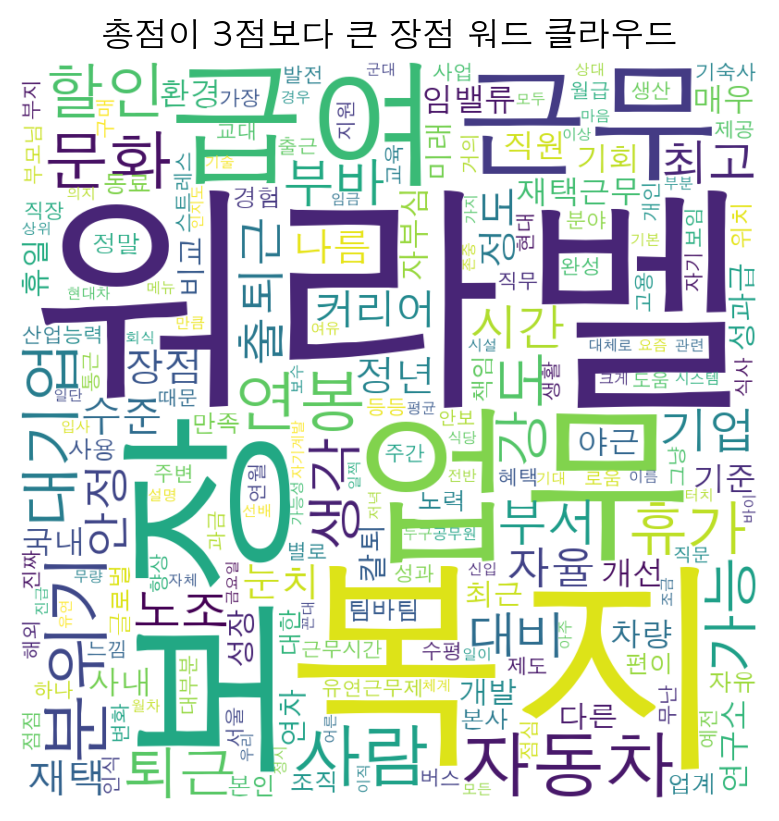

In [167]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[df["총점"] > 3]["장점"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "총점이 3점보다 큰 장점 워드 클라우드")


### 직무별 장점&제목

### 워라밸 별점에 따른 장단점

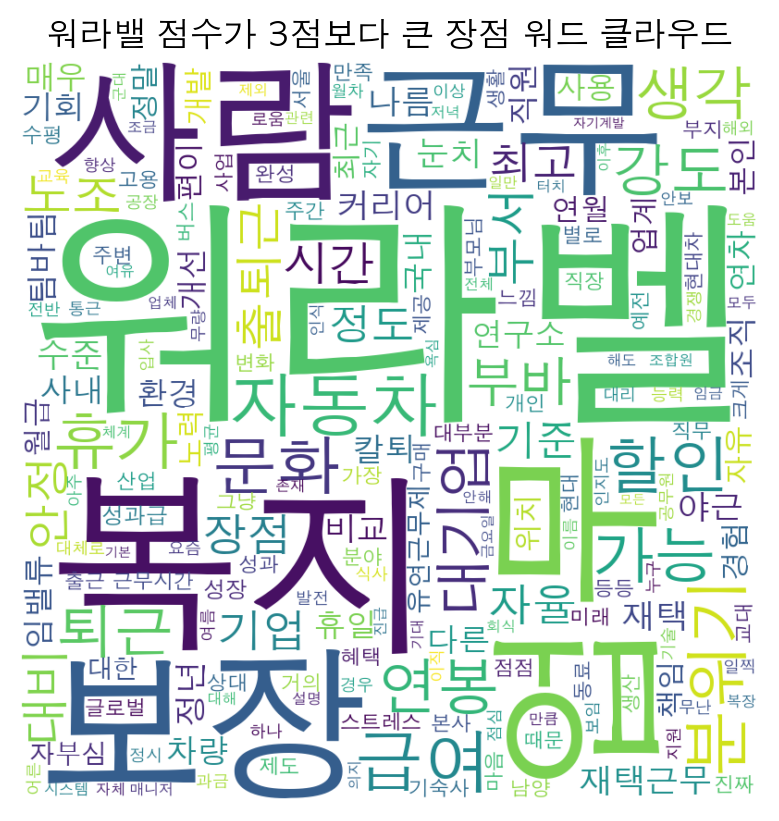

In [168]:

point = df[df["업무와 삶의 균형"] > 3]["장점"].str.cat(sep=" ")
make_word_cloud(point, "워라밸 점수가 3점보다 큰 장점 워드 클라우드")


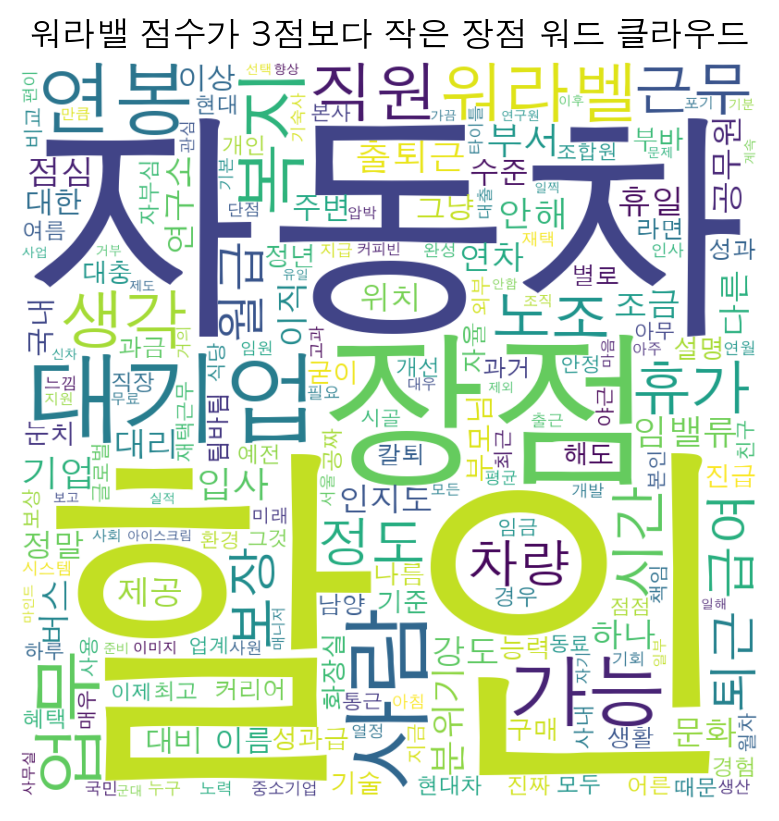

In [170]:

point = df[df["업무와 삶의 균형"] < 3]["장점"].str.cat(sep=" ")
make_word_cloud(point, "워라밸 점수가 3점보다 작은 장점 워드 클라우드")


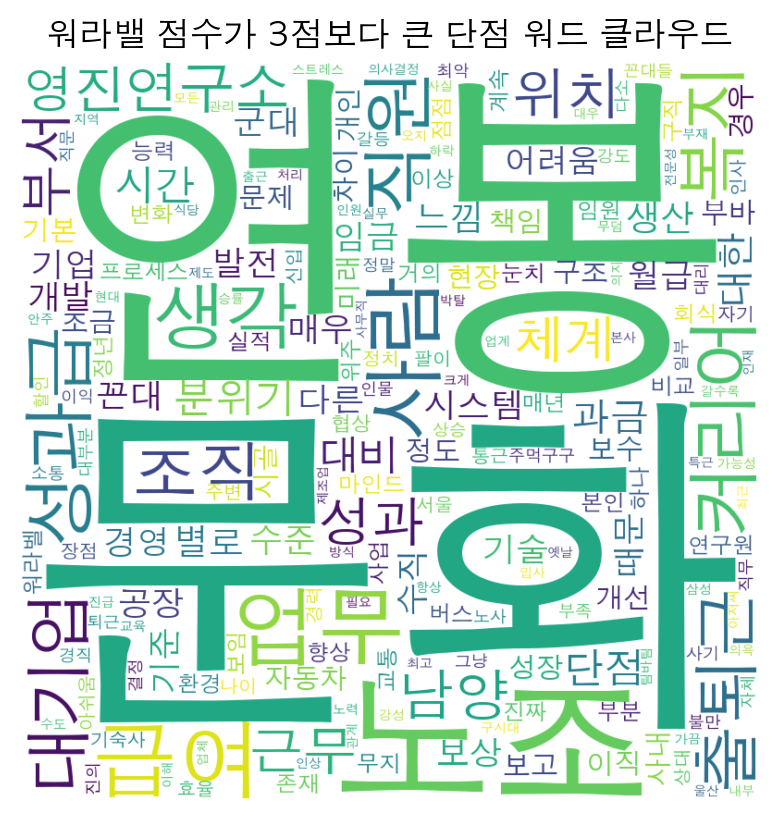

In [172]:

point = df[df["업무와 삶의 균형"] > 3]["단점"].str.cat(sep=" ")
make_word_cloud(point, "워라밸 점수가 3점보다 큰 단점 워드 클라우드")


In [173]:
df.head(1)

총점  커리어 향상  업무와 삶의 균형  급여 및 복지  사내 문화  경영진  \
0  1.0       1          1        1      1    1   

                                         제목  \
0  “연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”   

                                                장점  \
0  연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임   

                                            단점  직무  
0  회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴  구매

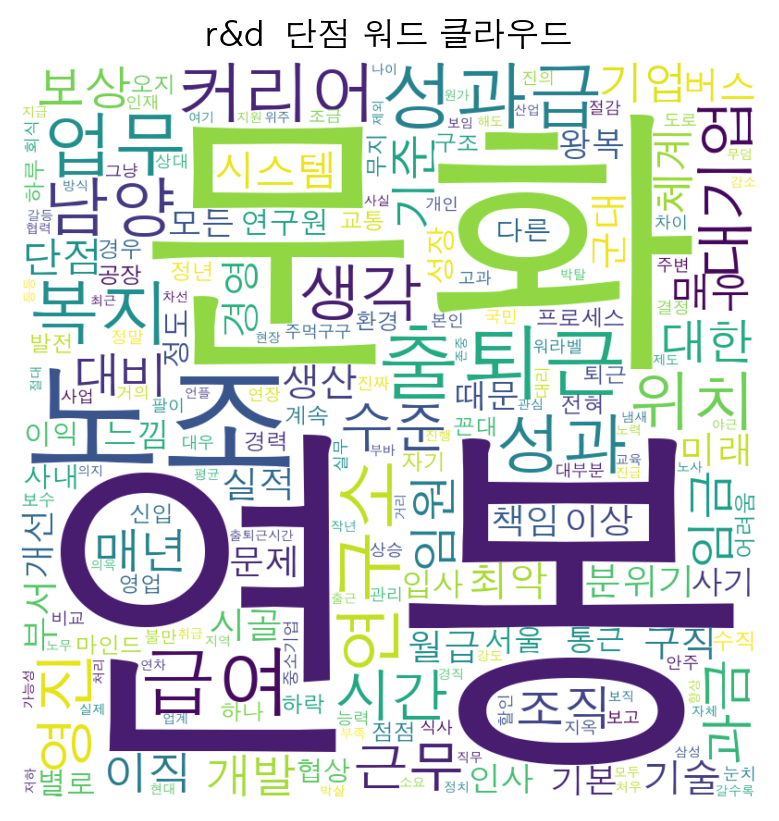

In [185]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[df["직무"] =='연구개발(R&D)']["단점"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "r&d  단점 워드 클라우드")


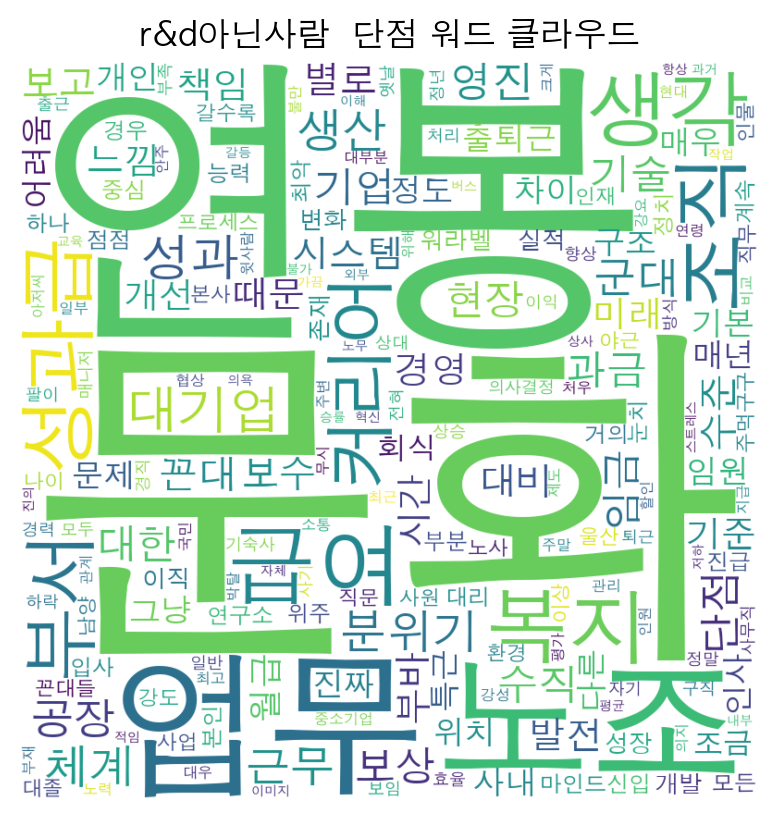

In [186]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[df["직무"] !='연구개발(R&D)']["단점"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "r&d아닌사람  단점 워드 클라우드")


In [199]:
df[df["직무"] !='IT 엔지니어']['총점'].mean()

2.8758288125376734

In [210]:
df[df["직무"] =='경영지원']['총점'].mean()

3.1494464944649447

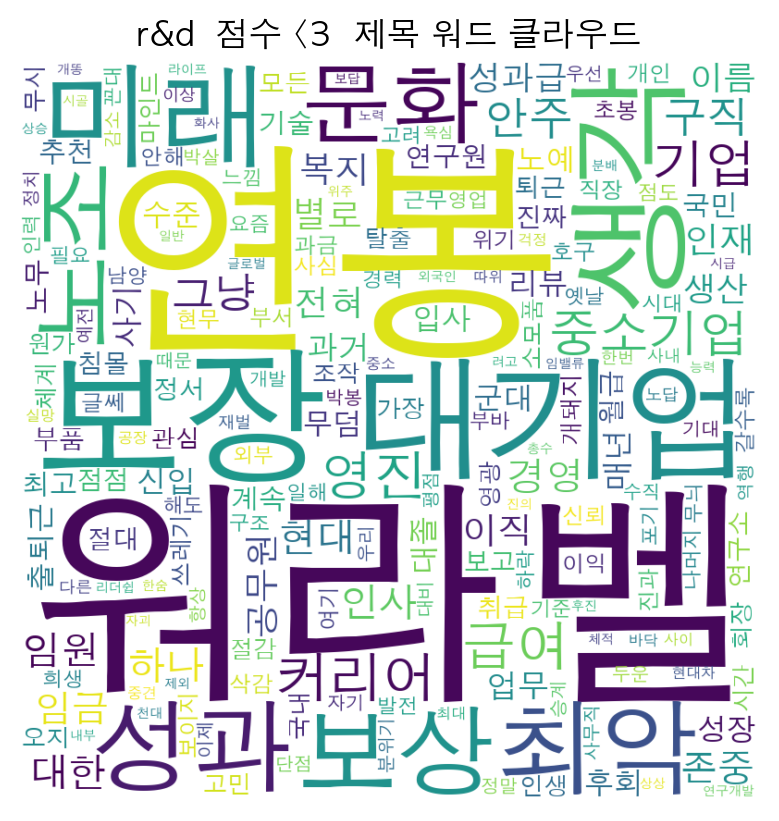

In [228]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[(df["직무"] =='연구개발(R&D)' ) & (df['총점']<3)]["제목"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "r&d  점수 <3  제목 워드 클라우드")


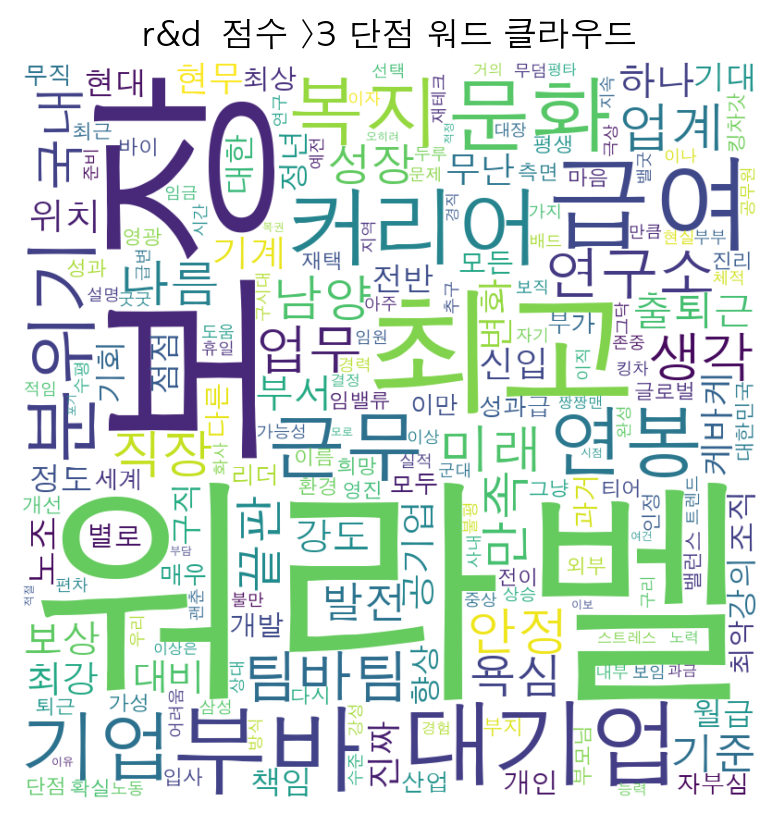

In [229]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[(df["직무"] =='연구개발(R&D)' ) & (df['총점']>3)]["제목"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "r&d  점수 >3 단점 워드 클라우드")


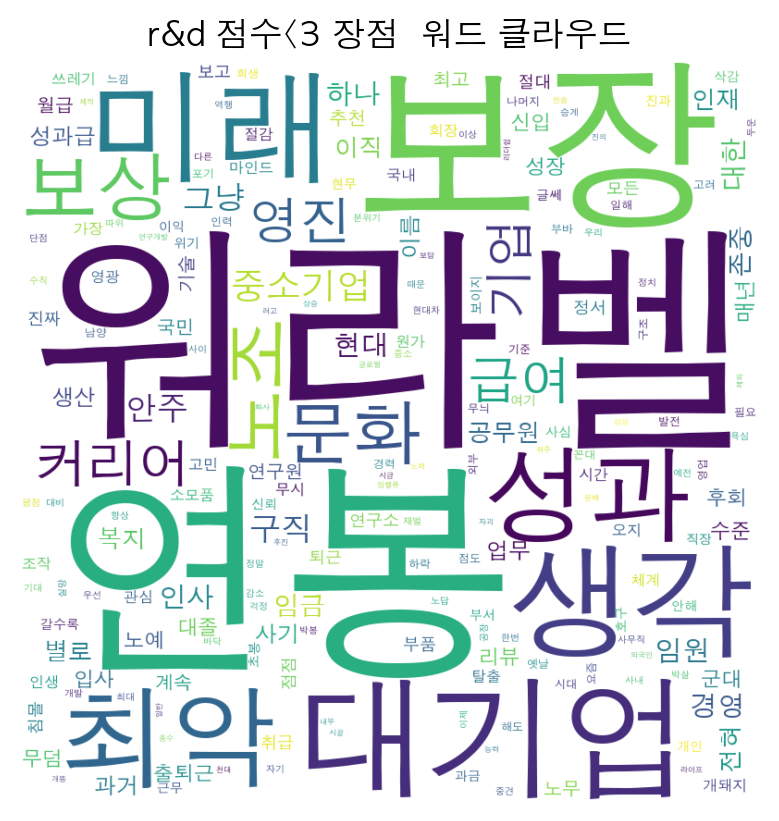

In [230]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[(df["직무"] =='연구개발(R&D)' ) & (df['총점']<3)]["제목"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "r&d 점수<3 장점  워드 클라우드")


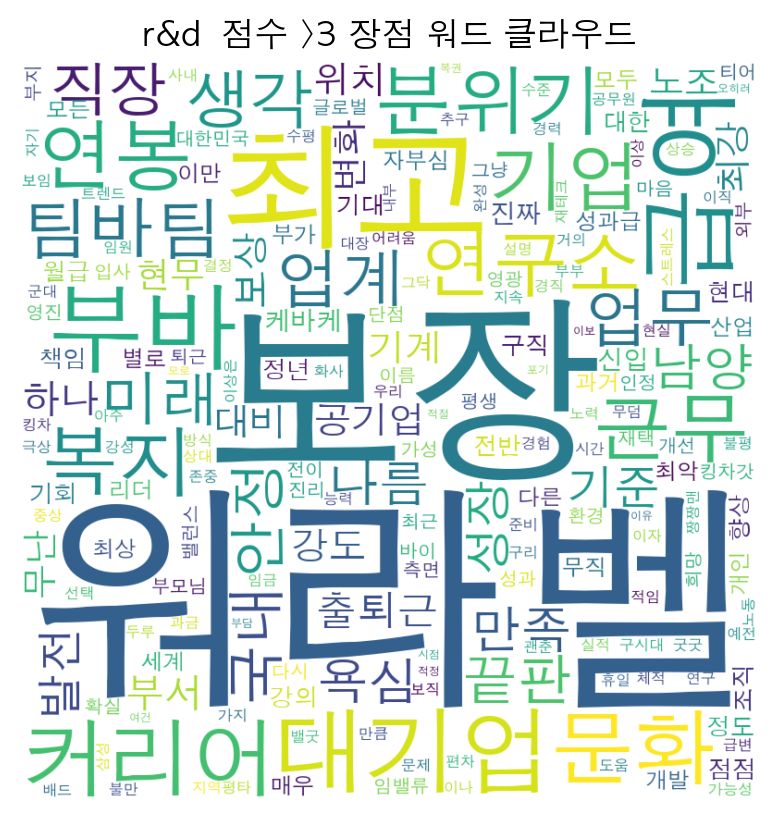

In [231]:
# 점수가 3 이하인 단점 텍스트를 연결
point = df[(df["직무"] =='연구개발(R&D)' ) & (df['총점']>3)]["제목"].str.cat(sep=" ")


# 점수가 3 이하인 단점 텍스트 워드 클라우드 생성
make_word_cloud(point, "r&d  점수 >3 장점 워드 클라우드")


In [227]:
df.head(1)

총점  커리어 향상  업무와 삶의 균형  급여 및 복지  사내 문화  경영진  \
0  1.0       1          1        1      1    1   

                                         제목  \
0  “연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”   

                                                장점  \
0  연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임   

                                            단점  직무  
0  회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴  구매

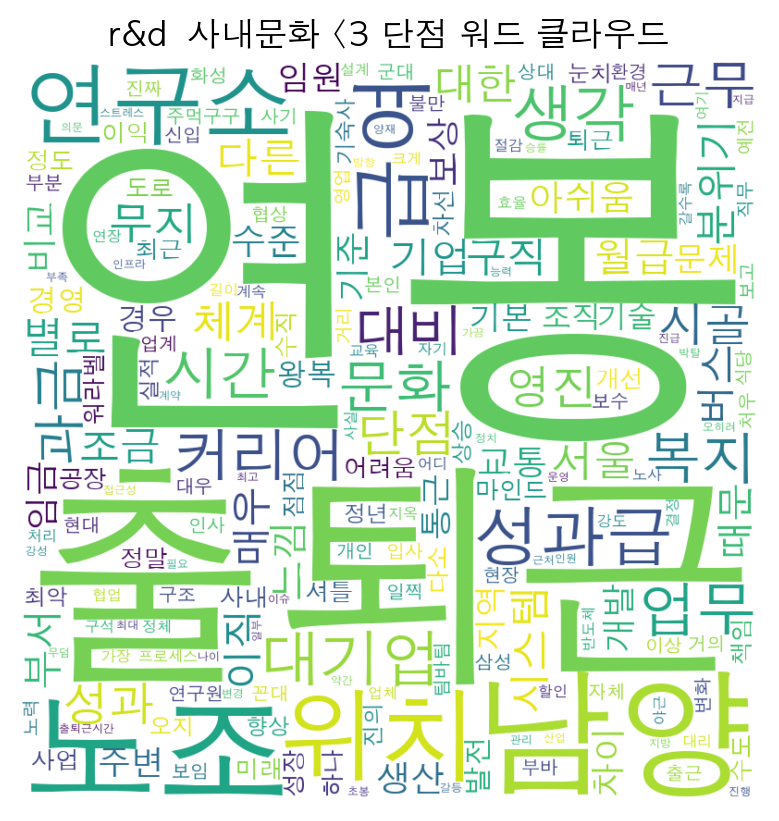

In [236]:

point = df[(df["직무"] =='연구개발(R&D)' ) & (df['사내 문화']>3)]["단점"].str.cat(sep=" ")


make_word_cloud(point, "r&d  사내문화 <3 단점 워드 클라우드")